In [2]:
from tensorflow.keras.datasets import mnist
import numpy as np

In [3]:
(train_images, train_labels),_=mnist.load_data()

In [4]:
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32')/255

In [7]:
train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images),784))],axis=1)
train_images_with_zeros = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

In [8]:
from tensorflow import keras
from tensorflow.keras import layers

In [9]:
def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer='rmsprop',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [10]:
model = get_model()
history_noise = model.fit(train_images_with_noise_channels, train_labels, epochs=10,
                    batch_size=128, validation_split=0.2)

model = get_model()
history_zeros = model.fit(train_images_with_zeros, train_labels, epochs = 10,
                          batch_size=128, validation_split=0.2)

2022-02-08 12:41:33.872317: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-08 12:41:33.873341: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 4. Tune using inter_op_parallelism_threads for best performance.


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 14s 282us/sample - loss: 0.6288 - accuracy: 0.8104 - val_loss: 0.3245 - val_accuracy: 0.8991
Epoch 2/10
48000/48000 [==============================] - 13s 263us/sample - loss: 0.2489 - accuracy: 0.9222 - val_loss: 0.1995 - val_accuracy: 0.9383
Epoch 3/10
48000/48000 [==============================] - 12s 257us/sample - loss: 0.1610 - accuracy: 0.9490 - val_loss: 0.1617 - val_accuracy: 0.9516
Epoch 4/10
48000/48000 [==============================] - 12s 258us/sample - loss: 0.1150 - accuracy: 0.9640 - val_loss: 0.1435 - val_accuracy: 0.9542
Epoch 5/10
48000/48000 [==============================] - 12s 253us/sample - loss: 0.0832 - accuracy: 0.9737 - val_loss: 0.1240 - val_accuracy: 0.9632
Epoch 6/10
48000/48000 [==============================] - 12s 257us/sample - loss: 0.0627 - accuracy: 0.9805 - val_loss: 0.1355 - val_accuracy: 0.9607
Epoch 7/10
48000/48000 [====================

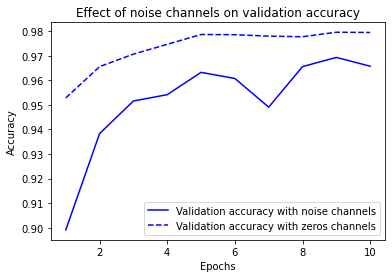

In [12]:
import matplotlib.pyplot as plt

val_acc_noise = history_noise.history['val_accuracy']
val_acc_zeros = history_zeros.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, val_acc_noise, 'b-', label='Validation accuracy with noise channels')
plt.plot(epochs, val_acc_zeros, 'b--', label='Validation accuracy with zeros channels')

plt.title('Effect of noise channels on validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
(train_images, train_labels),_ = mnist.load_data()
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32')/255

In [14]:
random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = get_model()
history_random_label = model.fit(train_images,random_train_labels,
                                 epochs=100,batch_size=128, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 9s 179us/sample - loss: 2.3171 - accuracy: 0.1024 - val_loss: 2.3058 - val_accuracy: 0.1085
Epoch 2/100
48000/48000 [==============================] - 8s 159us/sample - loss: 2.3001 - accuracy: 0.1154 - val_loss: 2.3103 - val_accuracy: 0.1042
Epoch 3/100
48000/48000 [==============================] - 8s 157us/sample - loss: 2.2908 - accuracy: 0.1278 - val_loss: 2.3186 - val_accuracy: 0.1059
Epoch 4/100
48000/48000 [==============================] - 8s 158us/sample - loss: 2.2774 - accuracy: 0.1405 - val_loss: 2.3267 - val_accuracy: 0.1044
Epoch 5/100
48000/48000 [==============================] - 8s 176us/sample - loss: 2.2599 - accuracy: 0.1527 - val_loss: 2.3381 - val_accuracy: 0.1014
Epoch 6/100
48000/48000 [==============================] - 7s 156us/sample - loss: 2.2391 - accuracy: 0.1666 - val_loss: 2.3536 - val_accuracy: 0.1002
Epoch 7/100
48000/48000 [===================

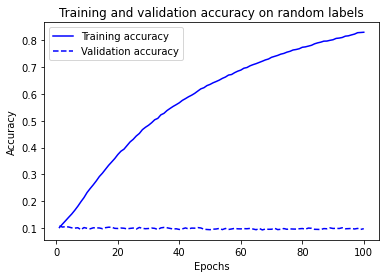

In [15]:
epochs = range(1,101)
train_acc = history_random_label.history['accuracy']
val_acc = history_random_label.history['val_accuracy']
plt.plot(epochs, train_acc, 'b-', label='Training accuracy')
plt.plot(epochs, val_acc, 'b--', label = 'Validation accuracy')
plt.title('Training and validation accuracy on random labels')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [16]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [17]:
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32')/255

In [18]:
model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer = keras.optimizers.RMSprop(1.),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(train_images, train_labels, epochs = 10, batch_size = 128, validation_split = 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 9s 177us/sample - loss: 1067.4222 - accuracy: 0.3821 - val_loss: 2.1940 - val_accuracy: 0.3467
Epoch 2/10
48000/48000 [==============================] - 7s 153us/sample - loss: 6.3659 - accuracy: 0.2773 - val_loss: 2.3212 - val_accuracy: 0.2954
Epoch 3/10
48000/48000 [==============================] - 7s 150us/sample - loss: 3.0713 - accuracy: 0.2410 - val_loss: 2.1936 - val_accuracy: 0.2445
Epoch 4/10
48000/48000 [==============================] - 8s 157us/sample - loss: 2.7347 - accuracy: 0.2503 - val_loss: 2.5588 - val_accuracy: 0.2262
Epoch 5/10
48000/48000 [==============================] - 8s 159us/sample - loss: 2.5292 - accuracy: 0.2380 - val_loss: 2.2306 - val_accuracy: 0.2706
Epoch 6/10
48000/48000 [==============================] - 7s 153us/sample - loss: 2.5371 - accuracy: 0.2426 - val_loss: 3.6413 - val_accuracy: 0.2420
Epoch 7/10
48000/48000 [=======================

In [20]:
model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer = keras.optimizers.RMSprop(1e-2),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(train_images, train_labels, epochs = 10, batch_size = 128, validation_split = 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 8s 175us/sample - loss: 0.4106 - accuracy: 0.9069 - val_loss: 0.1643 - val_accuracy: 0.9563
Epoch 2/10
48000/48000 [==============================] - 8s 158us/sample - loss: 0.1420 - accuracy: 0.9638 - val_loss: 0.1412 - val_accuracy: 0.9670
Epoch 3/10
48000/48000 [==============================] - 8s 159us/sample - loss: 0.1142 - accuracy: 0.9732 - val_loss: 0.1669 - val_accuracy: 0.9707
Epoch 4/10
48000/48000 [==============================] - 7s 150us/sample - loss: 0.0983 - accuracy: 0.9783 - val_loss: 0.1780 - val_accuracy: 0.9690
Epoch 5/10
48000/48000 [==============================] - 7s 152us/sample - loss: 0.0843 - accuracy: 0.9822 - val_loss: 0.2170 - val_accuracy: 0.9687
Epoch 6/10
48000/48000 [==============================] - 7s 151us/sample - loss: 0.0816 - accuracy: 0.9838 - val_loss: 0.2488 - val_accuracy: 0.9702
Epoch 7/10
48000/48000 [==========================

In [21]:
model = keras.Sequential([layers.Dense(10,activation='softmax')])
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_small_model = model.fit(train_images,train_labels,epochs=20,batch_size=128,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 3s 64us/sample - loss: 0.6658 - accuracy: 0.8368 - val_loss: 0.3592 - val_accuracy: 0.9043
Epoch 2/20
48000/48000 [==============================] - 2s 39us/sample - loss: 0.3509 - accuracy: 0.9034 - val_loss: 0.3072 - val_accuracy: 0.9136
Epoch 3/20
48000/48000 [==============================] - 2s 40us/sample - loss: 0.3150 - accuracy: 0.9122 - val_loss: 0.2909 - val_accuracy: 0.9179
Epoch 4/20
48000/48000 [==============================] - 2s 42us/sample - loss: 0.2995 - accuracy: 0.9168 - val_loss: 0.2809 - val_accuracy: 0.9221
Epoch 5/20
48000/48000 [==============================] - 2s 45us/sample - loss: 0.2898 - accuracy: 0.9183 - val_loss: 0.2741 - val_accuracy: 0.9241
Epoch 6/20
48000/48000 [==============================] - 2s 42us/sample - loss: 0.2828 - accuracy: 0.9209 - val_loss: 0.2716 - val_accuracy: 0.9248
Epoch 7/20
48000/48000 [==============================] 

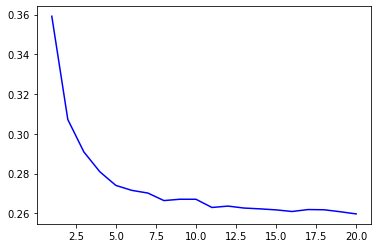

In [23]:
plt.plot(range(1,21),history_small_model.history['val_loss'],'b-')

In [24]:
model = keras.Sequential([
    layers.Dense(96, activation='relu'),
    layers.Dense(96, activation='relu'),
    layers.Dense(10,activation='softmax'),
                         ])
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_small_model = model.fit(train_images,train_labels,epochs=20,batch_size=128,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 5s 107us/sample - loss: 0.3690 - accuracy: 0.8960 - val_loss: 0.1823 - val_accuracy: 0.9467
Epoch 2/20
48000/48000 [==============================] - 4s 84us/sample - loss: 0.1608 - accuracy: 0.9524 - val_loss: 0.1348 - val_accuracy: 0.9613
Epoch 3/20
48000/48000 [==============================] - 4s 86us/sample - loss: 0.1120 - accuracy: 0.9664 - val_loss: 0.1146 - val_accuracy: 0.9657
Epoch 4/20
48000/48000 [==============================] - 4s 88us/sample - loss: 0.0864 - accuracy: 0.9741 - val_loss: 0.1135 - val_accuracy: 0.9638
Epoch 5/20
48000/48000 [==============================] - 5s 107us/sample - loss: 0.0689 - accuracy: 0.9796 - val_loss: 0.1013 - val_accuracy: 0.9702
Epoch 6/20
48000/48000 [==============================] - 5s 102us/sample - loss: 0.0567 - accuracy: 0.9828 - val_loss: 0.1001 - val_accuracy: 0.9712
Epoch 7/20
48000/48000 [=============================

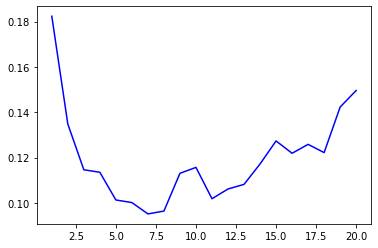

In [25]:
plt.plot(range(1,21),history_small_model.history['val_loss'],'b-')

In [26]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

/Users/xin/opt/anaconda3/envs/tf/lib/python3.7/site-packages/tensorflow_core/python/keras/datasets/imdb.py:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Users/xin/opt/anaconda3/envs/tf/lib/python3.7/site-packages/tensorflow_core/python/keras/datasets/imdb.py:130: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [27]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i,j] = 1.
    return results

In [28]:
train_data = vectorize_sequences(train_data)

In [33]:
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history_original = model.fit(train_data,train_labels, epochs = 20, batch_size=512, validation_split=0.4)

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 237us/sample - loss: 0.5072 - accuracy: 0.7793 - val_loss: 0.3715 - val_accuracy: 0.8753
Epoch 2/20
15000/15000 [==============================] - 2s 126us/sample - loss: 0.2929 - accuracy: 0.9067 - val_loss: 0.3789 - val_accuracy: 0.8393
Epoch 3/20
15000/15000 [==============================] - 2s 120us/sample - loss: 0.2135 - accuracy: 0.9291 - val_loss: 0.2798 - val_accuracy: 0.8887
Epoch 4/20
15000/15000 [==============================] - 2s 117us/sample - loss: 0.1668 - accuracy: 0.9469 - val_loss: 0.2758 - val_accuracy: 0.8902
Epoch 5/20
15000/15000 [==============================] - 2s 117us/sample - loss: 0.1367 - accuracy: 0.9573 - val_loss: 0.2988 - val_accuracy: 0.8818
Epoch 6/20
15000/15000 [==============================] - 2s 119us/sample - loss: 0.1151 - accuracy: 0.9649 - val_loss: 0.3061 - val_accuracy: 0.8833
Epoch 7/20
15000/15000 [==========================

In [34]:
model = keras.Sequential([
    layers.Dense(4, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history_smaller_model = model.fit(train_data,train_labels, epochs = 20, batch_size=512, validation_split=0.4)

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 286us/sample - loss: 0.5589 - accuracy: 0.7729 - val_loss: 0.4599 - val_accuracy: 0.8503
Epoch 2/20
15000/15000 [==============================] - 3s 193us/sample - loss: 0.3940 - accuracy: 0.8829 - val_loss: 0.3726 - val_accuracy: 0.8796
Epoch 3/20
15000/15000 [==============================] - 3s 191us/sample - loss: 0.3097 - accuracy: 0.9074 - val_loss: 0.3285 - val_accuracy: 0.8801
Epoch 4/20
15000/15000 [==============================] - 3s 190us/sample - loss: 0.2525 - accuracy: 0.9207 - val_loss: 0.3051 - val_accuracy: 0.8853
Epoch 5/20
15000/15000 [==============================] - 3s 193us/sample - loss: 0.2098 - accuracy: 0.9351 - val_loss: 0.2811 - val_accuracy: 0.8935
Epoch 6/20
15000/15000 [==============================] - 3s 192us/sample - loss: 0.1807 - accuracy: 0.9446 - val_loss: 0.2746 - val_accuracy: 0.8952
Epoch 7/20
15000/15000 [==========================

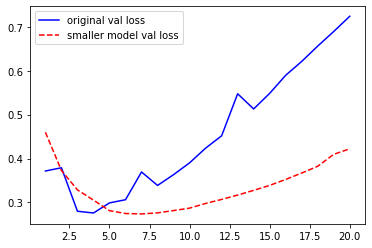

In [37]:
plt.plot(range(1,21),history_original.history['val_loss'],'b-',label='original val loss')
plt.plot(range(1,21),history_smaller_model.history['val_loss'], 'r--',label='smaller model val loss')
plt.legend()

In [41]:
np.argmin(history_original.history['val_loss'])+1

4

In [42]:
np.argmin(history_smaller_model.history['val_loss'])+1

7

In [43]:
model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history_larger_model = model.fit(train_data,train_labels, epochs = 20, batch_size=512, validation_split=0.4)

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 13s 860us/sample - loss: 0.5551 - accuracy: 0.7367 - val_loss: 0.3223 - val_accuracy: 0.8815
Epoch 2/20
15000/15000 [==============================] - 11s 746us/sample - loss: 0.2607 - accuracy: 0.9023 - val_loss: 0.2697 - val_accuracy: 0.8915
Epoch 3/20
15000/15000 [==============================] - 11s 762us/sample - loss: 0.1342 - accuracy: 0.9508 - val_loss: 0.3267 - val_accuracy: 0.8886
Epoch 4/20
15000/15000 [==============================] - 12s 790us/sample - loss: 0.0991 - accuracy: 0.9685 - val_loss: 0.3977 - val_accuracy: 0.8708
Epoch 5/20
15000/15000 [==============================] - 11s 766us/sample - loss: 0.0969 - accuracy: 0.9751 - val_loss: 0.3437 - val_accuracy: 0.8900
Epoch 6/20
15000/15000 [==============================] - 11s 751us/sample - loss: 0.0051 - accuracy: 0.9995 - val_loss: 0.5061 - val_accuracy: 0.8873
Epoch 7/20
15000/15000 [====================

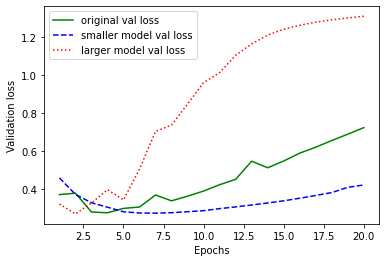

In [45]:
plt.plot(range(1,21),history_original.history['val_loss'],'g-',label='original val loss')
plt.plot(range(1,21),history_smaller_model.history['val_loss'], 'b--', label='smaller model val loss')
plt.plot(range(1,21),history_larger_model.history['val_loss'],'r:',label='larger model val loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.show()

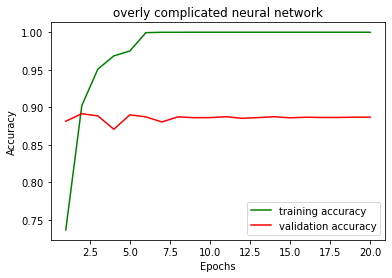

In [47]:
plt.plot(range(1,21),history_larger_model.history['accuracy'],'g-',label='training accuracy')
plt.plot(range(1,21),history_larger_model.history['val_accuracy'],'r-',label='validation accuracy')
plt.title('overly complicated neural network')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('overly complicated neural network.png')
plt.show()

In [48]:
from tensorflow.keras import regularizers

In [49]:
model = keras.Sequential([
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.002),
                 activation='relu'),
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.002),
                 activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history_l2_regularizer = model.fit(train_data,train_labels, epochs = 20, batch_size=512, validation_split=0.4)

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 240us/sample - loss: 0.6127 - accuracy: 0.7756 - val_loss: 0.4894 - val_accuracy: 0.8527
Epoch 2/20
15000/15000 [==============================] - 2s 122us/sample - loss: 0.4147 - accuracy: 0.8909 - val_loss: 0.3967 - val_accuracy: 0.8843
Epoch 3/20
15000/15000 [==============================] - 2s 136us/sample - loss: 0.3452 - accuracy: 0.9121 - val_loss: 0.3833 - val_accuracy: 0.8771
Epoch 4/20
15000/15000 [==============================] - 2s 144us/sample - loss: 0.3114 - accuracy: 0.9225 - val_loss: 0.3792 - val_accuracy: 0.8773
Epoch 5/20
15000/15000 [==============================] - 2s 127us/sample - loss: 0.2910 - accuracy: 0.9283 - val_loss: 0.4118 - val_accuracy: 0.8645
Epoch 6/20
15000/15000 [==============================] - 2s 126us/sample - loss: 0.2774 - accuracy: 0.9328 - val_loss: 0.3796 - val_accuracy: 0.8789
Epoch 7/20
15000/15000 [==========================

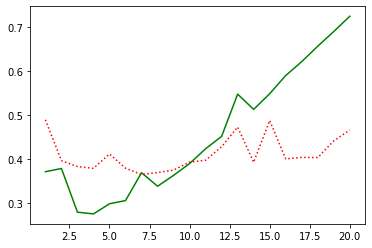

In [52]:
plt.plot(range(1,21),history_original.history['val_loss'],'g-')
plt.plot(range(1,21),history_l2_regularizer.history['val_loss'],'r:')

In [53]:
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history_dropout = model.fit(train_data,train_labels, epochs = 20, batch_size=512, validation_split=0.4)

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 296us/sample - loss: 0.6357 - accuracy: 0.6353 - val_loss: 0.5421 - val_accuracy: 0.7596
Epoch 2/20
15000/15000 [==============================] - 2s 128us/sample - loss: 0.5207 - accuracy: 0.7759 - val_loss: 0.4496 - val_accuracy: 0.8651
Epoch 3/20
15000/15000 [==============================] - 2s 138us/sample - loss: 0.4466 - accuracy: 0.8392 - val_loss: 0.3944 - val_accuracy: 0.8706
Epoch 4/20
15000/15000 [==============================] - 2s 146us/sample - loss: 0.3919 - accuracy: 0.8729 - val_loss: 0.3546 - val_accuracy: 0.8816
Epoch 5/20
15000/15000 [==============================] - 2s 142us/sample - loss: 0.3471 - accuracy: 0.8963 - val_loss: 0.3244 - val_accuracy: 0.8846
Epoch 6/20
15000/15000 [==============================] - 2s 122us/sample - loss: 0.3009 - accuracy: 0.9118 - val_loss: 0.3166 - val_accuracy: 0.8850
Epoch 7/20
15000/15000 [==========================

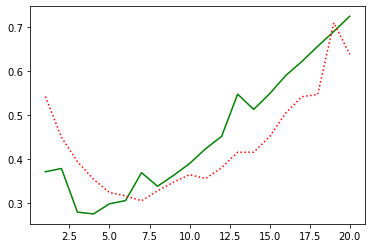

In [54]:
plt.plot(range(1,21),history_original.history['val_loss'],'g-')
plt.plot(range(1,21),history_dropout.history['val_loss'],'r:')